In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import all the libraries you require in the cell below.

In [ ]:
# import all necessary libraries here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Create a statistical summary of the data in the file “CommuteStLouis.csv”. Plot a histogram of age for the CommuteStLouis data.

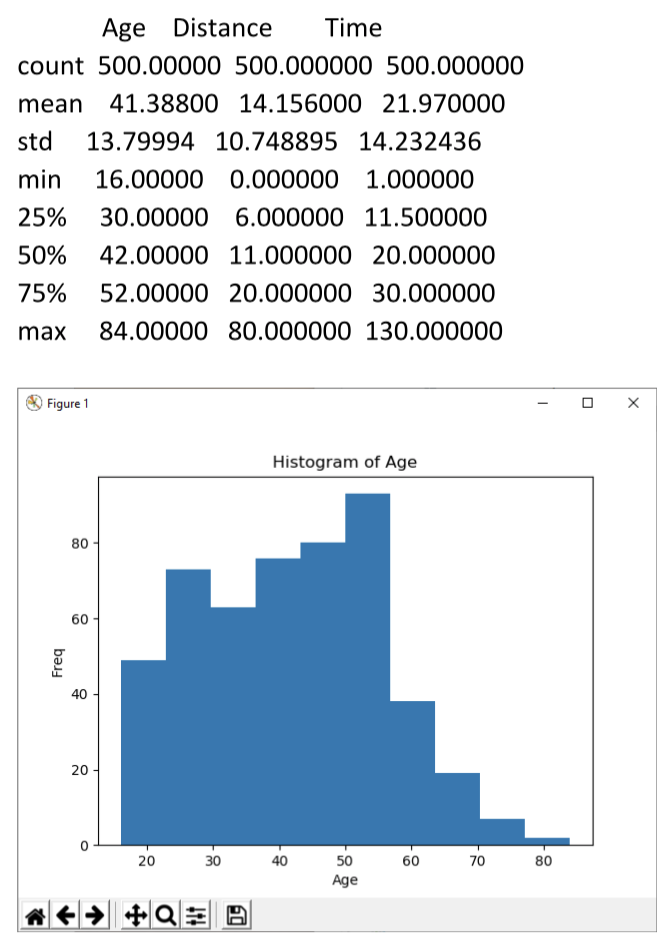

             Age    Distance        Time
count  500.00000  500.000000  500.000000
mean    41.38800   14.156000   21.970000
std     13.79994   10.748895   14.232436
min     16.00000    0.000000    1.000000
25%     30.00000    6.000000   11.500000
50%     42.00000   11.000000   20.000000
75%     52.00000   20.000000   30.000000
max     84.00000   80.000000  130.000000


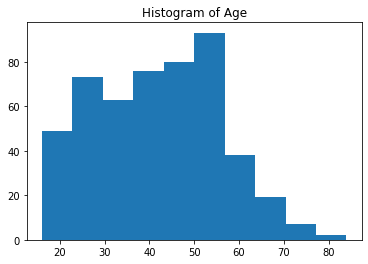

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/CommuteStLouis.csv')
print(df.describe()) # statistical summary
plt.hist(df.loc[~df['Age'].isnull(),'Age'],bins=10)
plt.title('Histogram of Age')
plt.show()

### 2. For the data CommuteStLouis:

a. Produce a correlation matrix of age, distance and time. Which two numeric variables are most highly correlated? What is the correlation coefficient for the above pair? Hint: If df is your dataframe then you can use print(df.corr()).

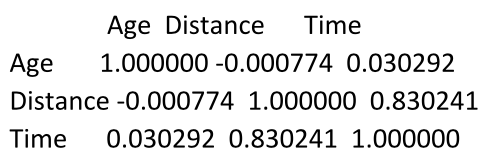

b. Create a scatterplot matrix of the numeric variables in the data. What do the figures in the diagonal going from the top left to the bottom right show? What can you say about the skewness of the various attributes?

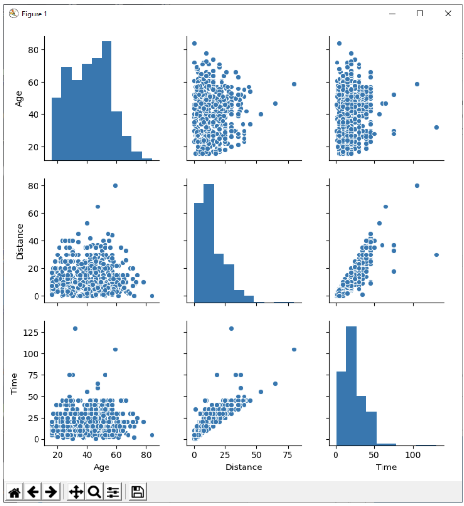

c. Produce a side-by-side boxplot of distance travelled by gender. Do the data in the file indicate that women tend to commute shorter distances?

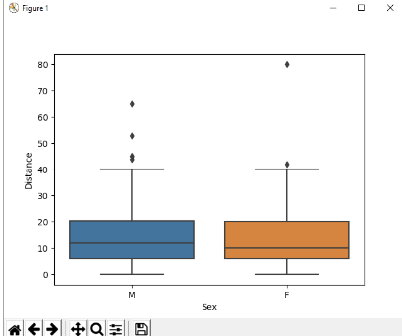

               Age  Distance      Time
Age       1.000000 -0.000774  0.030292
Distance -0.000774  1.000000  0.830241
Time      0.030292  0.830241  1.000000


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


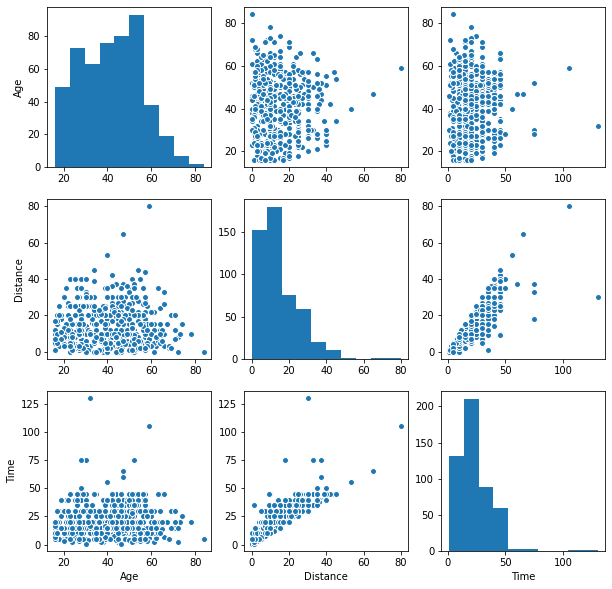

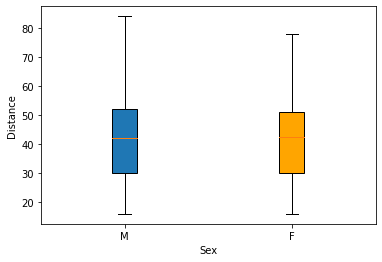

In [ ]:
# a
print(df.corr())

# b
fig, axs = plt.subplots(3, 3)
axs[0,0].set(ylabel="Age")
axs[1,0].set(ylabel="Distance")
axs[2,0].set(ylabel="Time")
axs[2,0].set(xlabel="Age")
axs[2,1].set(xlabel="Distance")
axs[2,2].set(xlabel="Time")
axs[0,0].hist(df.loc[~df['Age'].isnull(),'Age'],bins=10)
axs[0,1].scatter(df.loc[:,'Distance'],df.loc[:,'Age'],edgecolors='White')
axs[0,2].scatter(df.loc[:,'Time'],df.loc[:,'Age'],edgecolors='White')
axs[1,1].hist(df.loc[~df['Distance'].isnull(),'Distance'],bins=10)
axs[1,0].scatter(df.loc[:,'Age'],df.loc[:,'Distance'],edgecolors='White')
axs[1,2].scatter(df.loc[:,'Time'],df.loc[:,'Distance'],edgecolors='White')
axs[2,2].hist(df.loc[~df['Time'].isnull(),'Time'],bins=10)
axs[2,1].scatter(df.loc[:,'Distance'],df.loc[:,'Time'],edgecolors='White')
axs[2,0].scatter(df.loc[:,'Age'],df.loc[:,'Time'],edgecolors='White')
fig.set_figheight(10)
fig.set_figwidth(10)
# The figures in the diagonal show the distrubition of different variables: age, time and distance
# Skewness is related to the correlation coefficient. 

#c
isM = df['Sex'] == 'M'
isF = df['Sex'] == 'F'
fig,box = plt.subplots()
colorbox = box.boxplot([df['Age'][isM],df['Age'][isF]], patch_artist=True,labels=['M','F'])
box.set_ylabel('Distance')
box.set_xlabel('Sex')
colorbox['boxes'][1].set(facecolor = 'orange')
plt.show()
# Yes, as the data for women has a smaller median and interquartile range.

### 3. For the pair in Question 2.a plot the scatter plot. Also superimpose a linear regression line on the plot.

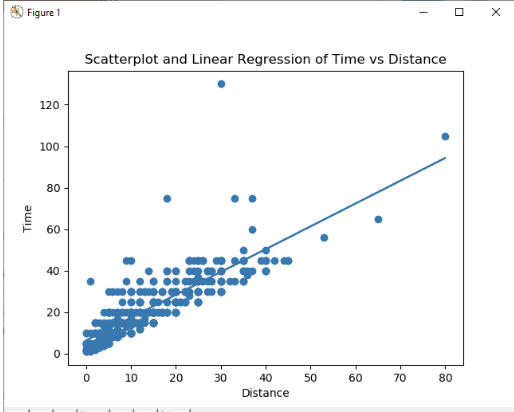

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """


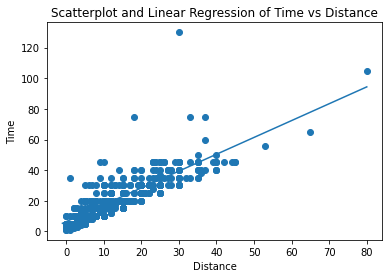

In [ ]:
from sklearn.linear_model import LinearRegression
x = df.loc[:, 'Distance']
y= df.loc[:,'Time']
model = LinearRegression(fit_intercept=True)
X = x[:, np.newaxis]
model.fit(X,y)
xfit = np.linspace(-1, 80, num=50)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)
plt.scatter(x, y)
plt.plot(xfit,yfit)
plt.title('Scatterplot and Linear Regression of Time vs Distance')
plt.ylabel('Time')
plt.xlabel('Distance')
plt.show()

### 4. Show the distribution of residuals of the data from Part 3.

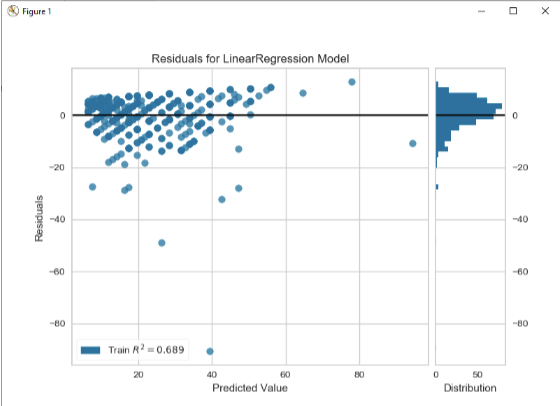

Text(0.5, 1.0, 'Residuals for LinearRegression Model')

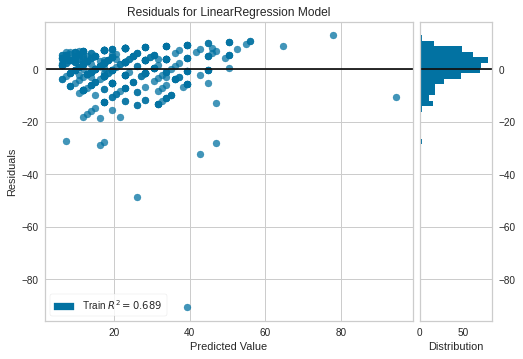

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(model)

visualizer.fit(X,y)
visualizer.finalize()
plt.title('Residuals for LinearRegression Model')